In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
import sys
import os
from glob import glob
import warnings
warnings.filterwarnings('ignore')

In [23]:
def find_indices(ID1,ID2,ID_min):
    ID2_index = []
    ID1_index = []
    index = 0
    for x in range(len(ID2)):
        if ID2[x] == ID1[index]:
            ID1_index.append(index)
            ID2_index.append(x)
            index += 1
        elif ID2[x] > ID1[index]:
            index += 1
        if (x+1>=ID_min):
            return ID1_index, ID2_index
    return ID1_index, ID2_index



def make_JmK_vs_MK(xaxis, yaxis, title, xtitle, ytitle):
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.ylim(-20,-40)
    plt.xlim(-1,8)
    plt.scatter(xaxis, yaxis, s=0.01)
    plt.show()

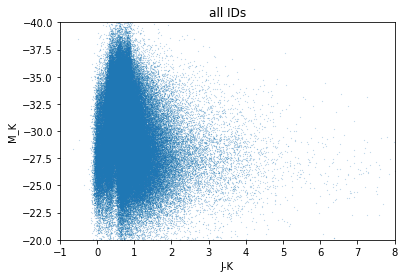

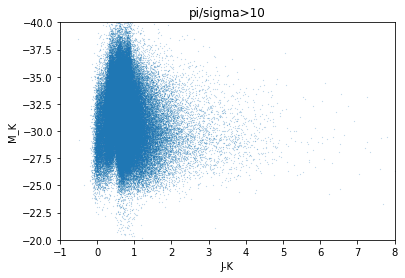

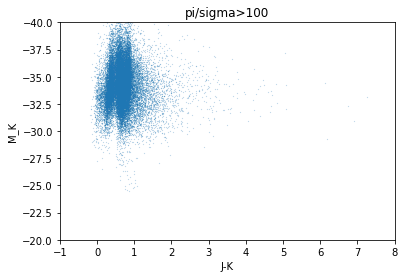

In [25]:
crossMatch = "allStar_l31c2_GaiaDR2_crossmatch_withpms.fits"
JKH = "allStar-l31c.2.fits" #J,kh valshdul2
HDU1 = fits.open(crossMatch)
HDU2 = fits.open(JKH)

ID1 = HDU1[1].data['APOGEE_ID']
ID2 = HDU2[1].data['APOGEE_ID']
ID_min = min(len(ID1), len(ID2))
#get rid of the IDs not in both
ID1 = np.sort(ID1)
ID2 = np.sort(ID2)
ID1_index, ID2_index = find_indices(ID1,ID2,ID_min)
   

parallax = HDU1[1].data['parallax'][ID1_index]
distance = .001/parallax
distance_mod = 5*np.log10(distance)-5
K_app = HDU2[1].data['K'][ID2_index]
J_app = HDU2[1].data['J'][ID2_index]
K_abs = distance_mod-K_app
J_abs = distance_mod-J_app
make_JmK_vs_MK(J_app-K_app, K_abs, "all IDs", "J-K", "M_K")


par_over_error = HDU1[1].data['parallax_over_error'][ID1_index]
sort = np.where(par_over_error>10)
K_app10 = K_app[sort]
J_app10 = J_app[sort]
K_abs10 = K_abs[sort]
J_abs10 = J_abs[sort]
make_JmK_vs_MK( J_app10-K_app10, K_abs10, "pi/sigma>10", "J-K", "M_K")


par_over_error = HDU1[1].data['parallax_over_error'][ID1_index]
sort = np.where(par_over_error>100)
K_app100 = K_app[sort]
J_app100 = J_app[sort]
K_abs100 = K_abs[sort]
J_abs100 = J_abs[sort]
make_JmK_vs_MK( J_app100-K_app100, K_abs100, "pi/sigma>100", "J-K", "M_K")



In [26]:
HDU1.info()
HDU2.info()
print(HDU1[1].header)
print(HDU2[1].header)

Filename: allStar_l31c2_GaiaDR2_crossmatch_withpms.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    280   254789R x 109C   ['D', 'J', 'D', '18A', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'E', 'I', 'K', '28A', 'K', 'K', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'E', 'D', 'D', 'D', 'D', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'J', 'J', 'J', 'J', 'E', 'E', 'D', 'D', 'I', 'L', 'E', 'D', 'D', 'E', 'I', 'I', 'E', 'J', 'I', 'L', 'J', 'D', 'D', 'E', 'E', 'J', 'D', 'D', 'E', 'E', 'J', 'D', 'D', 'E', 'E', 'E', 'I', 'E', 'E', 'E', 'D', 'D', 'J', 'E', 'E', 'E', '13A', 'D', 'D', 'D', 'D', 'K', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'K', 'E', 'E', 'E', 'E', 'E', 'E', '77A', '99A']   
Filename: allStar-l31c.2.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      15   ()      
  1                1 BinTableHDU    439   277371R x 208C   ['45A', '34

2014-08-10
XTENSION= 'IMAGE   '           / IMAGE extension                                BITPIX  =                  -32 / Number of bits per data pixel                  NAXIS   =                    1 / Number of data axes                            NAXIS1  =                 8575 /                                                PCOUNT  =                    0 / No Group Parameters                            GCOUNT  =                    1 / One Data Group                                 CRVAL1  =        4.17900000000 /                                                CDELT1  =    6.00000000000E-06 /                                                CRPIX1  =                    1 /                                                CTYPE1  = 'LOG-LINEAR'         /                                                DC-FLAG =                    1 /                                                BUNIT   = 'Flux (10^-17 erg/s/cm^2/Ang)' /                                      END                          

(15960, 16000)

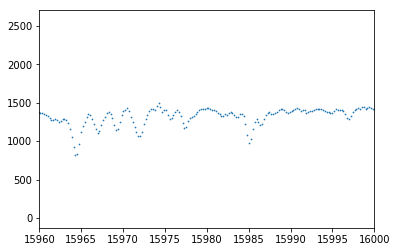

In [27]:
#A random fits file from Dr. Covey's server
random = "apStarC-r5-2M21432388+4209512.fits"
hdu = fits.open(random)


'''hdu[0].header['NAME'], where you can pull anything 
named NAME from the header file. See link (in slack) for list of NAME's. 
 https://data.sdss.org/datamodel/files/APOGEE_REDUX/APRED_VERS
/APSTAR_VERS/TELESCOPE/LOCATION_ID/apStar.html'''
date = hdu[0].header['DATE']
print(date)

#the header, showing starting wavelength and other
fluxhead = hdu[1].header 
print(fluxhead)
#the data
flux = hdu[1].data
print("\n", flux)

#relevant information (starting wavelength, and conversion) found in header
wavelength = 10.**(4.179+6e-6*np.arange(0,len(flux),1))

plt.scatter(wavelength,flux,s=0.5)
plt.xlim(15960,16000)